In [2]:
#After quickly reviewing the data, I realized there's a LOT of spam. Let's do some manual cleaning and delete some obvious spamers. 
import numpy as np 
import pandas as pd

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

In [4]:
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [5]:
from googletrans import Translator

translator = Translator()
translator.translate('안녕하세요.').text

'Hello.'

In [6]:
#Importing a dataset
df = pd.read_csv('Beltwitter_dataset.csv')

In [21]:
from langdetect import detect

In [22]:
# a function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [23]:
%%time
df['language'] = df['text'].apply(language_detection)

CPU times: user 8min 53s, sys: 6.88 s, total: 9min
Wall time: 9min 56s


In [32]:
#Manual filtering of some spam accounts and hashtags
df = df.drop(df[df.username == 'OddTools'].index)
df = df.drop(df[df.username == 'ftg_soccer'].index)
df = df.drop(df[df.username == 'JohnnyBetPicks'].index)
df = df.drop(df[df.username == 'COVID19_bot'].index)
df = df.drop(df[df.username == 'BelFootFeder'].index)
df = df.drop(df[df.username == 'VIPPicks'].index)
df = df.drop(df[df.username == 'btschartdata'].index)
df = df.drop(df[df.username == 'BiggBoss_Tak'].index)
df = df.drop(df[df.username == 'BTSChartDaily'].index)
df = df.drop(df[df.username == 'BTSPublicity'].index)
df = df.drop(df[df.username == 'justtan_s'].index)
df = df.drop(df[df.username == 'BrightWinEngSub'].index)
df = df.drop(df[df.username == 'GlobalBlackPink'].index)
df = df.drop(df[df.username == 'globalARMYforce'].index)
df = df.drop(df[df.username == 'BTSGlobalCharts'].index)
df = df.drop(df[df.username == 'svtcharts'].index)
df = df.drop(df[df.username == 'BTSVChartData'].index)
df = df.drop(df[df.username == 'BB_Votaciones'].index)

df = df.drop(df[df.hashtags == '#WATCH #NewYork #Instagram #instagood #Algeria #India #Australia #Germany #Ukraine #Belarus #Indonesia #Bitcoin #Bitcoin #France #YoutubeIndia #youtubevstiktok #YouTuber #Like #LIKEs #folowtrick #Videomesum #romania #Trending #StayHomeStaySafe'].index)
df = df.drop(df[df.hashtags == '#postcrossing'].index)
df = df.drop(df[df.hashtags == '#EurovisionAgain #EurovisionAgain'].index)
df = df.drop(df[df.hashtags == '#WATCH #Facebook #instagood #Algeria #India #Australia #Germany #Ukraine #Belarus #Indonesia #Bitcoin #Bitcoin #BTC #BTC #YoutubeIndia #YouTuber #YouTuber #Like #Spain #Videomesum #romania #USAonFire #Trending #uk #instagram #France #Italy'].index)
df = df.drop(df[df.hashtags == '#Barcelona #Florence #cooking #Gomel #Belarus #Brest #Moscow #Russia #Minsk #Vienna #Prague #Czech #Rome #Autumn #Nature #Budapest #Hungary #Egypt #Baden #Austria #Chechersk #St'].index)
df = df.drop(df[df.hashtags == '#Eurovision #Eurovision'].index)
df = df.drop(df[df.hashtags == '#BelarusPremierLeague'].index)
df = df.drop(df[df.hashtags == '#TREASURE'].index)
df = df.drop(df[df.hashtags == '#DubaiAnalEscorts #DubaiEscorts'].index)
df = df.drop(df[df.hashtags == '#WATCH #NewYork #Instagram #instagood #Algeria #India #Australia #Germany #Ukraine #Belarus #Indonesia #Bitcoin #Bitcoin #BTC #BTC #YoutubeIndia #youtubevstiktok #YouTuber #Like #LIKEs #folowtrick #Videomesum #romania #live #Trending #uk #instagram'].index)
df = df.drop(df[df.hashtags == '#WATCH #NewYork #Instagram #instagood #Algeria #India #Australia #Germany #Ukraine #Belarus #Indonesia #Bitcoin #Bitcoin #BTC #BTC #YoutubeIndia #youtubevstiktok #YouTuber #Like #LIKEs #folowtrick #Videomesum #romania #live #Trending #Stayhomestaysafe'].index)
df = df.drop(df[df.hashtags == '#GamblingTwitter'].index)
df = df.drop(df[df.hashtags == '#WATCH #NewYork #Instagram #instagood #Algeria #India #Australia #Germany #Ukraine #Belarus #Indonesia #Bitcoin #Bitcoin #France #YoutubeIndia #youtubevstiktok #YouTuber #Like #LIKEs #folowtrick #Videomesum #romania #Trending #Stayhomestaysafe'].index)
df = df.drop(df[df.hashtags == '#TREASURE'].index)


In [33]:
df.shape

(244164, 11)

In [46]:
len(df.language.value_counts())

49

In [34]:
# Convert the created_at column to np.datetime object
df['date'] = pd.to_datetime(df['date'])

In [35]:
#Please note that for some tweets the language wasn't properly detected.
df_ru =df[df.language == 'ru']

In [36]:
df_en =df[df.language == 'en']

In [37]:
df_else =df[(df['language'] != 'ru') & (df['language'] != 'en')]

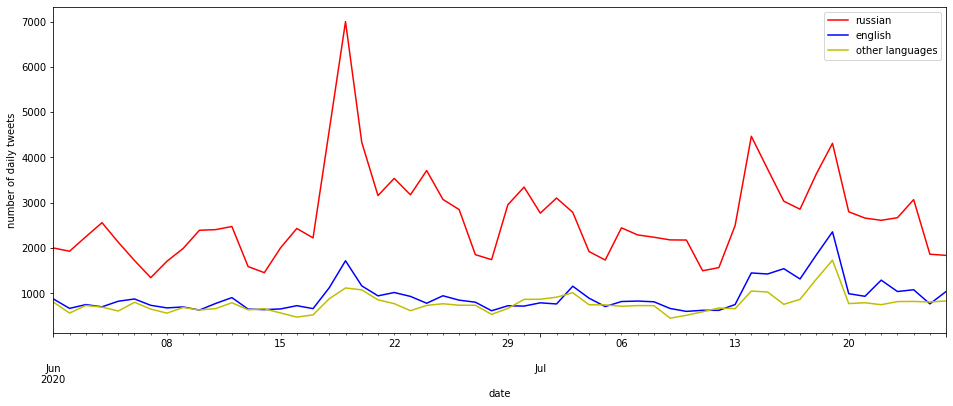

In [38]:
df_ru.resample('D', on='date').text.count().plot(color='r',figsize=(16,6), label = 'russian')
df_en.resample('D', on='date').text.count().plot(color='b',figsize=(16,6), label = 'english')
df_else.resample('D', on='date').text.count().plot(color='y',figsize=(16,6),label = 'other languages')
plt.ylabel('number of daily tweets')
plt.legend()

In [39]:
fav_max = np.max(df_ru['favorites'])
fav = df_ru[df_ru.favorites == fav_max].index[0]
# Max FAVs:
print("Tweet with most likes: \n{}".format(df_ru['text'][fav]))
print("Number of likes: {}".format(fav_max))
print("Username: {}".format(df_ru['username'][fav]))
print ("Translation: {}".format(translator.translate(df_ru['text'][fav]).text))

Tweet with most likes: 
Рубрика «кратко о пиздеце в еБларуси сегодня»: - кандидат в президенты В.Бабарико собрал 425.000 подписей, но по пути в ЦИК их с сыном завинтили, адвокатов не пускают, в их доме обыски - кандидатке Тиханоской угрожают похищением детей, мвд отказался от расследования
Number of likes: 15044
Username: _tomato_hater
Translation: The rubric "briefly about fucking in eBlarus today": - presidential candidate V. Babariko collected 425,000 signatures, but on the way to the CEC they screwed him up with his son, lawyers are not allowed, searches in their house - candidate Tikhanoskaya are threatened with kidnapping, the Ministry of Internal Affairs refused to investigate


In [40]:
fav_max = np.max(df_en['favorites'])
fav = df_en[df_en.favorites == fav_max].index[0]
# Max FAVs:
print("Tweet with most likes: \n{}".format(df_en['text'][fav]))
print("Number of likes: {}".format(fav_max))
print("Username: {}".format(df_en['username'][fav]))
print ("Translation: {}".format(translator.translate(df_en['text'][fav]).text))


Tweet with most likes: 
People across Belarus are fed up with Lukashenko regime brutality and repression. "The human capacity for patience and endurance, in the face of blatant injustice, is not without limits." ( @HannaLiubakova) #FreeBelarus
Number of likes: 9647
Username: YourAnonCentral
Translation: People across Belarus are fed up with Lukashenko regime brutality and repression. "The human capacity for patience and endurance, in the face of blatant injustice, is not without limits." ( @HannaLiubakova) #FreeBelarus


In [41]:
fav_max = np.max(df_else['favorites'])
fav = df_else[df_else.favorites == fav_max].index[0]
# Max FAVs:
print("Tweet with most likes: \n{}".format(df_else['text'][fav]))
print("Number of likes: {}".format(fav_max))
print("Username: {}".format(df_else['username'][fav]))
print ("Translation: {}".format(translator.translate(df_else['text'][fav]).text))

Tweet with most likes: 
ナスが英語でエッグプラントと呼ばれる理由がようやく分かったわ。
Number of likes: 33216
Username: LoveFromMinsk
Translation: I finally figured out why eggplant is called Eggplant in English.


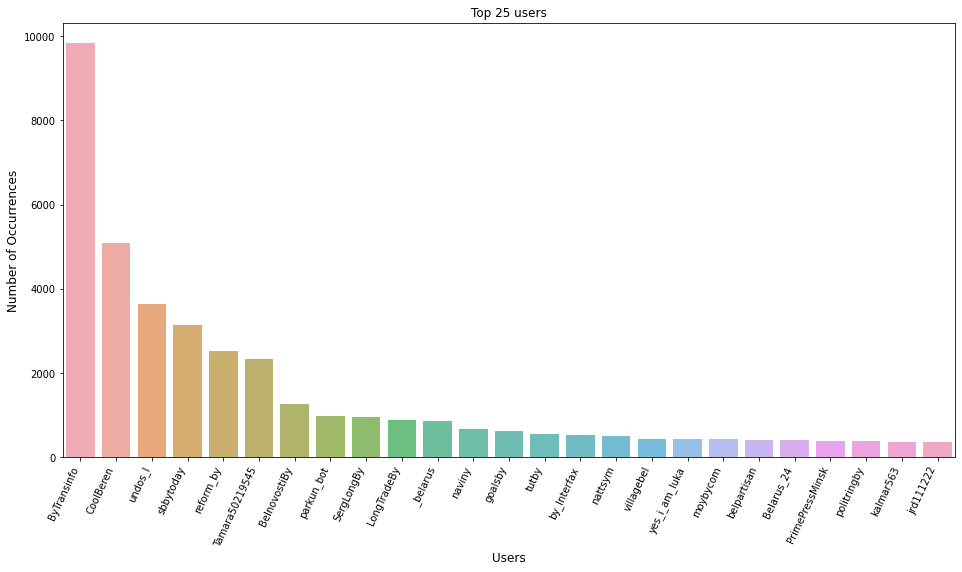

In [51]:
users_count  = df_ru['username'].value_counts()
users_count = users_count[:25,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 25 users')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Users', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

In [56]:
df['hashtags'].value_counts().index.tolist()

['#Belarus',
 '#belarus',
 '#brest_by',
 '#belarus #twiby',
 '#minsk',
 '#Minsk',
 '#COVID19',
 '#fcdm1927',
 '#KarabakhisAzerbaijan #StopArmenianAggression #ireli2020 #HumanRights #HumanRightsViolations #OSCE #MinskGroup',
 '#news',
 '#KarabakhisAzerbaijan #StopArmenianAggression #ireli2020 #HumanRightsViolations',
 '#Minsk #Belarus',
 '#KarabakhisAzerbaijan #ArmenianAgression #StopArmenianAggression #HumanRights #HumanRightsViolations #OSCE #MinskGroup #NKAZE',
 '#KarabakhisAzerbaijan #StopArmenianAggression #StopArmenianOccupation #ireli2020 #HumanRights #HumanRightsViolations',
 '#Belarus #Minsk',
 '#KarabakhisAzerbaijan #ArmenianAgression #StopArmenianAggression #StopArmenianOccupation #HumanRights #HumanRightsViolations #OSCE #MinskGroup #NKAZE',
 '#Belarus #Twibbon',
 '#twiby',
 '#survivor2020',
 '#coronavirus',
 '#Lukashenko',
 '#Belarus #Lukashenko',
 '#ArmenianManipulation',
 '#minsk #belarus',
 '#military #Minsk #StopArmenianAggression #ireli2020 #HumanRights #HumanRightsVio

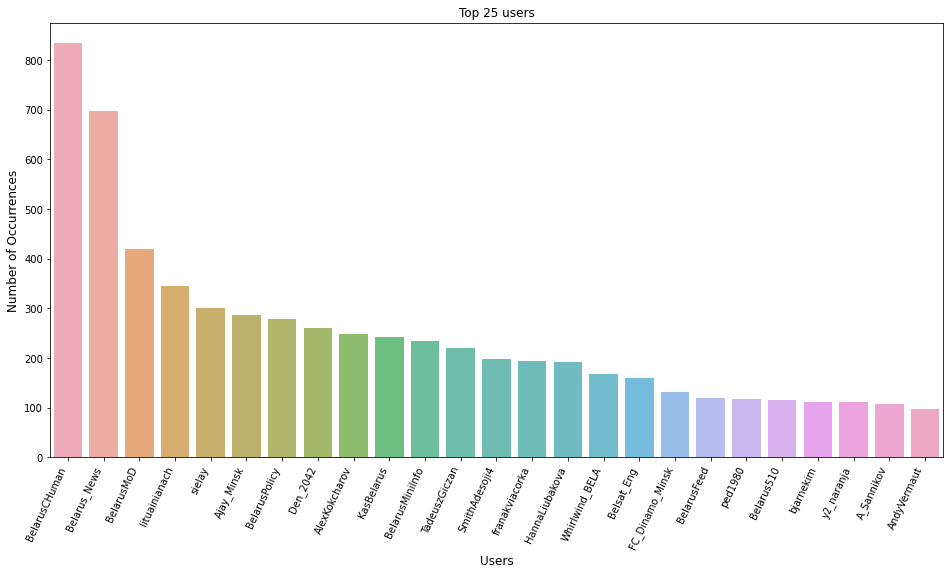

In [43]:
users_count  = df_en['username'].value_counts()
users_count = users_count[:25,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 25 users')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Users', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

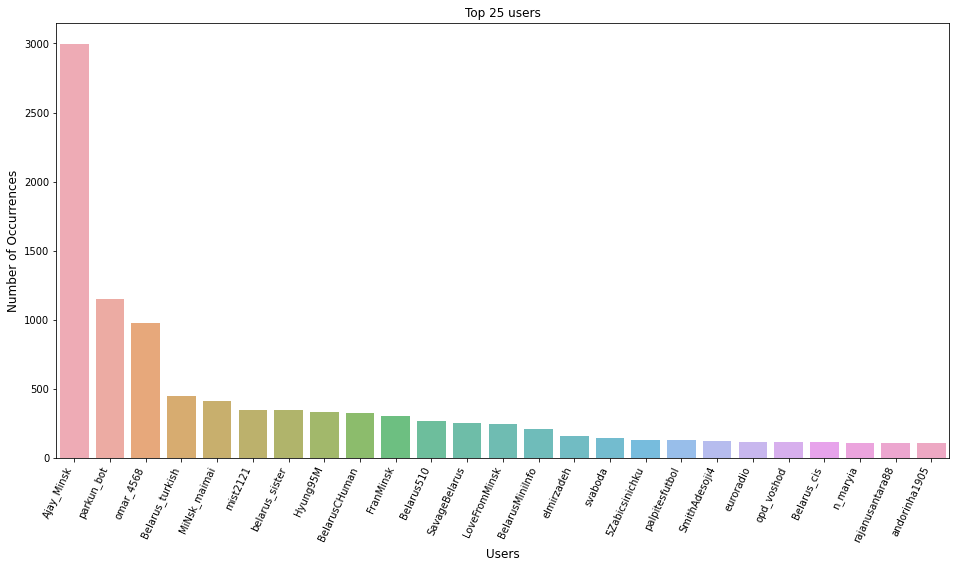

In [44]:
users_count  = df_else['username'].value_counts()
users_count = users_count[:25,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 25 users')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Users', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

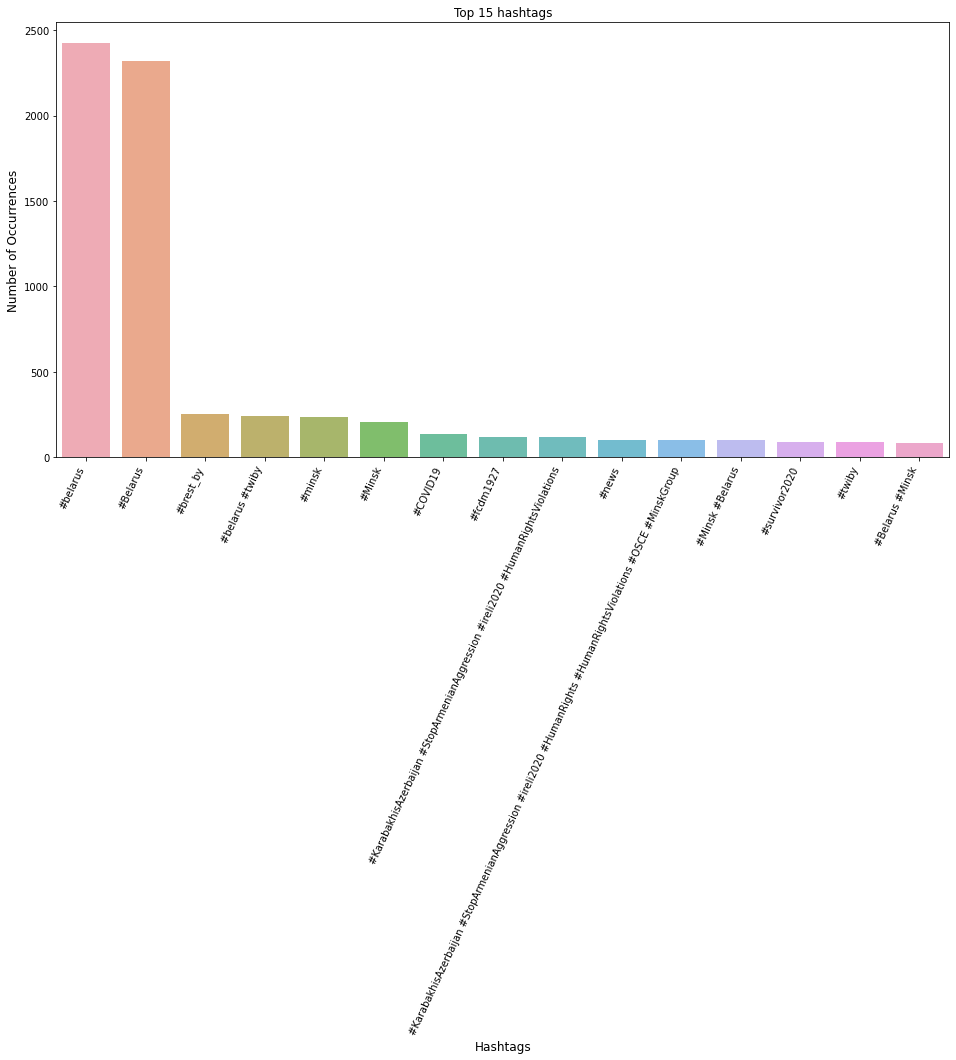

In [48]:
hashtags_count  = df['hashtags'].value_counts()
hashtags_count = hashtags_count[:15,]
plt.figure(figsize=(16,8))
sns.barplot(hashtags_count.index, hashtags_count.values, alpha=0.8)
plt.title('Top 15 hashtags')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hashtags', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()